### **Renta Fija**

Hoy trabajaremos en analizar las tasas de interés del tesoro norteamericano, veremos la evolución a través del tiempo de cada uno de los intrumentos e intentaremos concluir sobre el nivel de aversión al riesgo y las expectativas del mercado.

Para iniciar, empezaremos estudiando las tasas desde Abril de 2009.

In [0]:
#Importamos las Librerías necesarias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
start = datetime(2009,1,4)
import pandas_datareader.data as web

#### Obtenemos Data Financiera
Existen librerías muy utiles, pandas_datareader nos permite obtener datos financieros de múltiples fuentes confiables, entre ellas: Yahoo Finance y FRED

In [2]:
#Risk Free
US_rates = web.get_data_fred(["DTB3", "DGS3MO", "DTB6", "DGS6MO", "DTB1YR", "DGS2", "DGS10"], start)
US_rates = US_rates.fillna(method="ffill")
US_rates.index = pd.to_datetime(US_rates.index)
US_rates.tail(1)

,DTB3,DGS3MO,DTB6,DGS6MO,DTB1YR,DGS2,DGS10
DATE,,,,,,,
2019-02-14,2.38,2.43,2.45,2.51,2.45,2.5,2.66


**Observación**: Esta tabla nos muestra las tasas del tesoro, preeliminarmente vemos que la diferencia en PB entre bonos de corto plazo y largo plazo es casi nula, esto indica que las expectativas del mercado hacia el futuro no son muy prometedoras. A contunuación veremos en detalle las implicancias de estas diferencias.

**El comportamiento que exhiben las tasas se le conoce como "aplanamiento de la curva de rendimientos"**

#### Veamos que ocurre con la evolución de los niveles de tasa de interés para diversas madureces

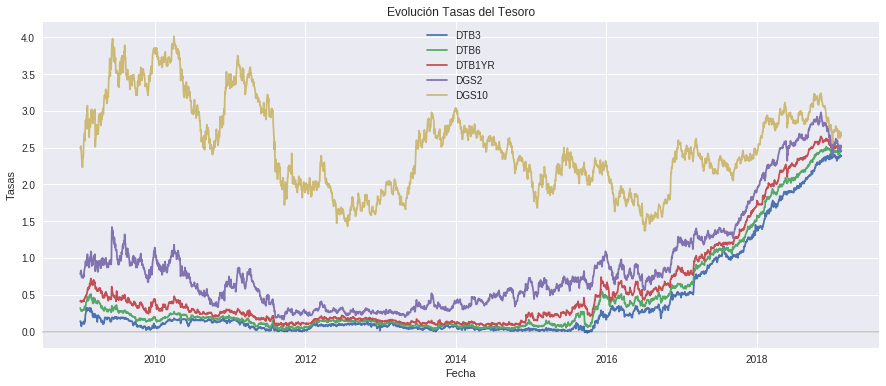

In [3]:
yield_curve = US_rates[["DTB3", "DTB6", "DTB1YR", "DGS2", "DGS10"]]
yield_curve.plot(figsize=(15, 6))
plt.title("Evolución Tasas del Tesoro")
plt.xlabel("Fecha")
plt.ylabel("Tasas")
plt.axhline(0, color='black', linewidth=0.3)

Vemos que la tasa larga ha caido desde el año 2010 a la fecha (Febrero, 2019). A su vez el costo de financiamiento de corto plazo va al alza. Esto tradicionalmente es leído como una perspectiva de desaceleración económica. Entre las razones que los economistan dan:

- La FED va a terminar con una politica monetaria expansiva.
- Que el crecimiento real de la economía está cayendo por debajo de las expectativas y por tanto la percepción de riesgo en el corto plazo se va pareciendo más a la de largo plazo (del que existe una mayor incertidumbre y por tanto tradicionalmente se cobra más).

Fuente de documentos que aportan con evidencia empírica a la capacidad predictiva de "la curva de rendimientos plana" sobre crisis financieras:
https://www.newyorkfed.org/research/capital_markets/ycfaq.html

#### Veamos que ocurre con el spread entre tasas largas y cortas

En este caso ocuparemos el spread entre tasas a 10 años y las tasas a 3 meses. Tradicionalmente este spread es el que tiene la mayor capacidad predictiva de entre los analizados.

In [0]:
#Spread Historico
start1 = datetime(1985,1,4)
US_rates1 = web.get_data_fred(["DTB3", "DGS3MO", "DTB6", "DGS6MO", "DTB1YR", "DGS2", "DGS10"], start1)
yield_curve1 = US_rates1[["DTB3", "DTB6", "DTB1YR", "DGS2", "DGS10"]]

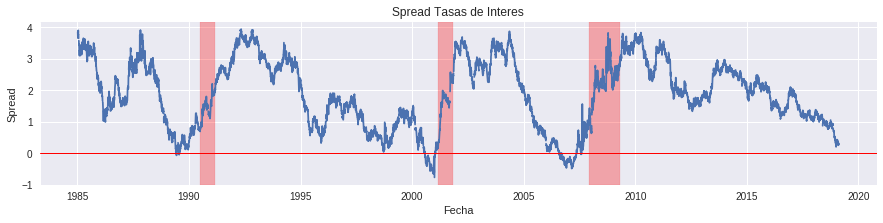

In [5]:
spread = {"Spread 10 años - 2 años": yield_curve1["DGS10"]-yield_curve1["DGS2"],
         "Spread 10 años - 1 años": yield_curve1["DGS10"]-yield_curve1["DTB1YR"],
         "Spread 10 años - 6 meses": yield_curve1["DGS10"]-yield_curve1["DTB6"],
         "Spread 10 años - 3 meses": yield_curve1["DGS10"]-yield_curve1["DTB3"],}

spread = pd.DataFrame(spread)
spread["Spread 10 años - 3 meses"].plot(figsize=(15, 3))
plt.xlabel("Fecha")
plt.ylabel("Spread")
plt.axhline(0, color='red', linewidth=1)
plt.title("Spread Tasas de Interes")
plt.axvspan("1990-7-1", "1991-3-1", alpha=0.3, color='red') #S&L
plt.axvspan("2001-3-1", "2001-11-1", alpha=0.3, color='red') #Dotcom
plt.axvspan("2007-12-1", "2009-5-1", alpha=0.3, color='red') #Subprime (aproximación fechas basados en FRED)



Vemos que desde 1990 cada vez que el spread ha sido negativo o muy cerca de estarlo, luego han venido periodos de crisis o turbulencias financieras:
- **1989**: Savings&Loans, crisis bancaria en Estados Unidos, quiebra de más de 1000 de asociaciones de prestamos en Estados Unidos. Estas servían para financiar hipotecas de norteamericanos. 
- **1998**: Default de bonos de Rusia aumentó la incertidumbre en mercados financieros. Esto más tarde llevó a que LTCM quebrara obligando a que el sistema financiero tuviera que hacer un "bail-in" (mismos bancos tomaron posesión de LTCM luego de la intervención de la FED) para evitar que la caida de este Hedge Fund llevara a la quiebra a otros bancos y con ello el comienzo de una crisis financiera global (LTCM mantenía en sus posiciones 5% de la renta fija global (Investopedia, 2018)).

   Si bien no es catalogado como una crisis financiera, sí fue un periodo de alto stress en los mercados financieros. Pruebas de liquidez posteriores muestran que los mercados financieros sufrieron shocks de liquidez previo al quiebre de LTCM tal como ocurrió con los "Quants" en 2007 (Andrew W. Lo, Adaptive Markets)
- **2000-2001**: Producto de la burbuja especulativa "puntocom" entre los años 1998 y 2001 que llevó a que compañías a estar en extremo sobrevaloradas. El shock que provocó las ventas masivas, fueron ordenes de venta de acciones hechas por Dell y Cisco entre otros lideres sobre sus propias acciones. En meses las capitalizaciones de compañías tecnológicas valuadas en millones de dólares llegaron a practicamente cero (Investopedia, Dotcom Bubble).
- **2007-2009**: Crisis Subprime. Burbuja especulativa del sector inmobiliario. Lo caracterizan (*los expertos atribuyen la crisis a*) precios más allá del valor intrinseco de los activos, deudas de mala calidad, liberalización de regulaciones que incentivaron los elementos anteriores.

Es interesante leer sobre los defaults estratégicos que realizaron algunos hogares norteamericanos mencionado en el artículo "The Gordon Gekko Effect: The Role of Culture in the Financial Industry" de Andrew W. Lo. Relata los hallazgos de Cohen-Cole and Morse (2010). Que quienes poseen una casa valuada en menos que su hipoteca tienen un 74% más de probabilidades de caer en default a pesar de tener las condiciones para pagar y recibir posibilidades de refinanciar deuda.

- **¿2019-2020?** 

**Fuentes**:
- Adaptive Markets, Andrew W. Lo 
- https://www.investopedia.com/terms/s/sl-crisis.asp
- https://www.investopedia.com/terms/l/longtermcapital.asp
- https://www.investopedia.com/terms/d/dotcom-bubble.asp
- https://www.investopedia.com/terms/s/subprime-meltdown.asp
- https://www.nber.org/papers/w21267

#### Controlando las señales mixtas del mercado

A continuación se analizan los spreads desde 2017 para 2 años, 1 año, 6 meses y (nuevamente) 3 meses. 

Esto tiene como objetivo intentar determinar en que estado del "aplanamiento" está la curva de rendimientos. 

Usar sólo el spread de 10 años a 3 meses si bien usualmente demuestra una mayor capacidad predicitva que los otros spreads, no puede ser el unico utilizado. Ya que uno podría dar muestras de una futura desaceleración, pero el resto no. Es decir, señales mixtas. Por eso, los spreads tienen que ser analizados en conjunto.

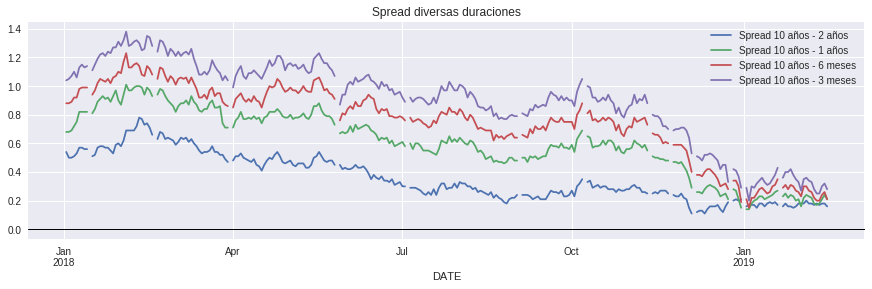

In [6]:
start4=datetime(2018,1,2)
spreads1 = spread[start4:]
spreads1 = spreads1[["Spread 10 años - 2 años", "Spread 10 años - 1 años",  "Spread 10 años - 6 meses", "Spread 10 años - 3 meses"]]

spreads1.plot(figsize=(15,4))
plt.title("Spread diversas duraciones")
plt.axhline(y=0, color='black', linewidth=1)


Vemos en los gráficos que absolutamente todos los spreads contra las tasas largas van aproximandose al nivel de cero spread. 

Lo que puede ser una señal de que el mercado ve una recesión en camino. Sin embargo, el nivel de spread más bajo ocurrió en Diciembre, probablemente al mismo tiempo que el S&P500 sufrió las mayores pérdidas en el año 2018.

Hoy en Febrero podemos ver como el índice ha ido recuperando casi todo lo perdido en Diciembre y llega a los niveles que tuvo a inicios de dicho mes.

Es necesario ver como se desarrollan los mercados para poder concluir más sobre que irá a pasar más adelante durante este año.

#### Spreads corporativos US

Tradicionalmente utilizado como una medida de aversión al riesgo global. Un mayor spread es leído como una mayor aversión al riesgo, ya que los inversionistas descuentan los pagos de un bono corporativo a una tasa más alta que la de un activo libre de riesgo.

Un spread más bajo significa una menor aversión al riesgo o un mayor apetito por riesgo. Ya que el mercado al cobrarle una tasa más cercana a la libre de riesgo está tratando dichos bonos corporativos como si fueran menos riesgosos (Cuando no necesariamente sean menos riesgosos).

- **BAMLC0A4CBBB**: US Corporate BBB Option-Adjusted Spread
- **BAMLH0A0HYM2**: US High Yield Master II Option-Adjusted Spread



In [8]:
start2 = datetime(1996,11,30)
corporate_bonds = web.get_data_fred(["BAMLC0A4CBBB", "BAMLH0A0HYM2", "BAMLHE00EHYIOAS"], start2)
corporate_bonds.tail(1)


,BAMLC0A4CBBB,BAMLH0A0HYM2,BAMLHE00EHYIOAS
DATE,,,
2019-02-14,1.73,4.17,4.35


##### Spreads corporativos históricos BBB, High Yield US

Desde FRED se pueden acceder a datos desde 1996. 

- **BBB**: Empresas consideradas seguras por el mercado. Mientras más alto sea mayor será la aversión al riesgo existente, por cuanto activos ligeramente más riesgosos se les estará cobrando una tasa proporcionalmente más alta que la de un bono soberano. Spread más altos pueden ser considerados como un "flight to quality" de los inversionistas.

- **High Yield US**: Spread entre bonos riesgosos (Alta tasa de interes) y activos "libres de riesgo" (Tesoro Norteamericano)

Abajo tenemos información sobre los spreads desde 1996, las líneas horizontales marcan los promedios es esa ventana de tiempo. Hoy vemos que los spreads han ido al alza durante 2018, volviendo al promedio desde 1996. Lo que nos dice que la aversión ha ido aumentando o regresando a sus niveles promedio. 

Esto podría deprimir con el tiempo el precio de los activos. O descomprimir los premios por riesgo a nivel global.


Text(0.5, 1.0, 'High Yield USA')

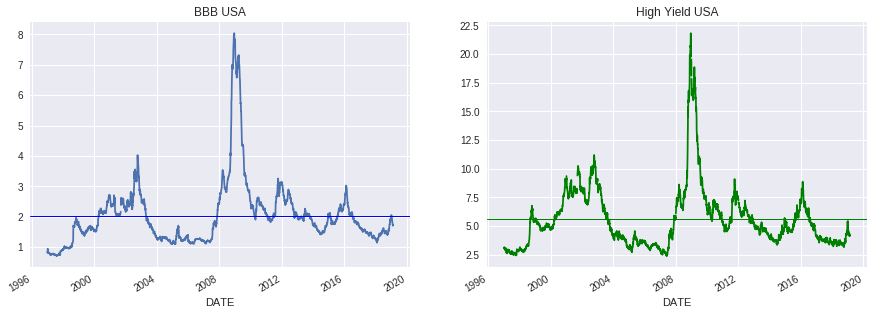

In [9]:
#Spread Historico

bbb = corporate_bonds["BAMLC0A4CBBB"].mean()
high_yield_US = corporate_bonds["BAMLH0A0HYM2"].mean()

fig0 = plt.figure(figsize=(15,5))
ax01 = fig0.add_subplot(1, 2, 1)
corporate_bonds["BAMLC0A4CBBB"].plot()
plt.axhline(y=[bbb], color='blue', linewidth=1)
plt.title("BBB USA")
ax02 = fig0.add_subplot(1, 2, 2)
corporate_bonds["BAMLH0A0HYM2"].plot(c="green")
plt.axhline(y=[high_yield_US], color='green', linewidth=1)
plt.title("High Yield USA")


##### Spreads corporativos desde 2017

Vemos que el spread corporativo para bonos de alto rendimiento (más riesgosos) sube con más fuerza desde Septiembre que los spread de empresas con deudas clasifiadas con BBB. Esto porque los primeros son más riesgosos que los calificados BBB.

Este aumento aún deja el actual spread de alto rendimiento por debajo del promedio desde 1996 (en torno a 5%, línea roja en gráfico en la parte superior), pero por arriba del promedio de 2 años. Lo que indica que las condiciones financieras podrían estar empeorando con respecto a niveles recientes.



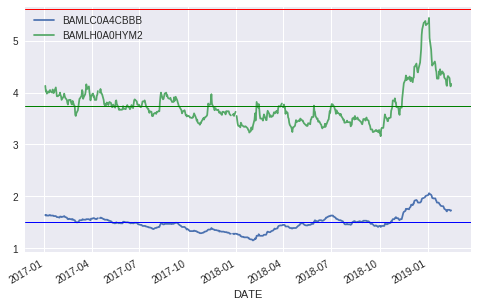

In [10]:
start3=datetime(2017,1,2)
corporate_bonds1 = corporate_bonds[start3:]
corporate_bonds1 = corporate_bonds1[["BAMLC0A4CBBB", "BAMLH0A0HYM2"]]
bbb1 = corporate_bonds1["BAMLC0A4CBBB"].mean()
high_yield_US1 = corporate_bonds1["BAMLH0A0HYM2"].mean()
corporate_bonds1.plot(figsize=(8,5))
plt.axhline(y=[bbb1], color='blue', linewidth=1) #PROMEDIO HISTORICO BBB US
plt.axhline(y=[high_yield_US], color='red', linewidth=1) #PROMEDIO HISTORICO HIGH YIELD US
plt.axhline(y=[high_yield_US1], color='green', linewidth=1) #PROMEDIO 2 AÑOS HIGH YIELD US

Entre las explicaciones económicas a los movimientos de los spreads desde Febrero de 2018:

- Por la misma fecha coincide una abrupta correción del S&P500 ante temores de que la FED acelerara el alza en las tasas de interés por temores de inflación ante la publicación de que por primera vez desde el 2009.

- Desde Septiembre suben con más fuerza el spread probablemente entre los factores está el recrudecimiento de la guerra comercial entre EEUU y China ante el anuncio de nuevas tarifas para el país asiático unido a una represalia de este último contra el primero.

**Fuentes**:
- https://money.cnn.com/2018/02/02/news/economy/january-jobs-report-2018/index.html
- https://www.bbc.com/news/business-44529600

#### Conclusiones

Vemos que las condiciones financieras empiezan a empeorar partiendo por un cambio en las expectativas económicas que apuesta sus fichas a una recesión en 2020. 

Entre los indicadores más mencionados en los medios está el spread de tasas largas contra tasas cortas de los bonos de tesoro (10 años vs. a 3 meses). Que indica que una recesión podría estar cerca.

La incertidumbre política y económica, la desaceleración de China entre otros factores están influyendo en las correciones que el mercado ha sufrido este último año.



**Fuentes**: 

- http://fortune.com/2018/09/13/jpmorgan-next-financial-crisis/